In [15]:
from keras.datasets import fashion_mnist


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Shape of training matrix:", X_train.shape)
print("Shape of test matrix:", X_test.shape)

Shape of training matrix: (60000, 28, 28)
Shape of test matrix: (10000, 28, 28)


In [0]:
# We have to reshape appropriately before we feed the CNN

X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [0]:
# Scaling

X_train = X_train /255.0 
X_test = X_test /255.0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
__________

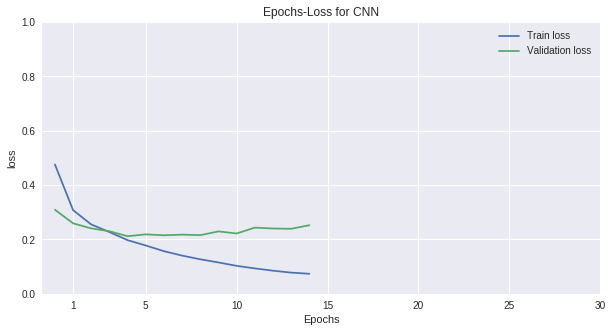

In [19]:
from keras.models import Sequential
from keras.layers import MaxPooling2D,Dense, Dropout, Flatten,Conv2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import set_random_seed

set_random_seed(432)
np.random.seed(234)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(2, 2), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

epochs = 30
batch_size = 64

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2,
          callbacks=[es])

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

In [21]:
pos = np.argmin(history.history['val_loss'])
print("The epoch with the minimum validation loss is:", pos+1)
print("The Train Accuracy is: {0:.5f}".format(history.history['acc'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_acc'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

The epoch with the minimum validation loss is: 5
The Train Accuracy is: 0.92725
The Validation Accuracy is: 0.92100
10000/10000 [==============================] - 1s 120us/step
Test loss: 0.28807361024171113
Test accuracy: 0.9252
